# Evaulation

This notebook is setup to help evaluate the runs

In [1]:
%matplotlib inline
from dotmap import DotMap
from envs import *
import os
import dill as pickle
import run_learning
import numpy as np
import run_eval
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
from stable_baselines3 import SAC

# Find Desired Runs

In [2]:
def look_through_folders():
    for folder in os.listdir("./Runs"):
        folder_param_path = os.path.join(os.path.join("./Runs", folder), "params.pkl")
        if os.path.exists(folder_param_path):
            with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
                params = pickle.load(f)
            print("Eps: ", str(params.eps), ", Gamma: ", str(params.gamma), ", LearningRate: ", str(params.learning_rate))
            print("Eval_Freq: ", str(params.init_state))
#look_through_folders()

In [5]:
def check(params):
    match = bool(1
    #and params.timesteps == 275000
    #and params.gamma == 0.98
    and params.id == 1
    #and params.eps == 1
    #and params.learning_rate == 0.0003
    #and params.envs.newpendulum.run == True
    )
    return match

def filt(check):
    matches = []
    for folder in os.listdir("./Runs"):
        folder_param_path = os.path.join(os.path.join("./Runs", folder), "params.pkl")
        if os.path.exists(folder_param_path):
            with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
                params = pickle.load(f)
            if check(params):
                matches.append(folder)
    return matches

a = ['02_17_2022_083556_Mohsin', '02_17_2022_074751_Mohsin', '02_17_2022_043715_Mohsin']
filt(check)

['02_21_2022_021015_Mohsin',
 '02_21_2022_054632_Mohsin',
 '02_21_2022_092231_Mohsin',
 '02_20_2022_204158_Mohsin']

# Evaluate Desired Runs

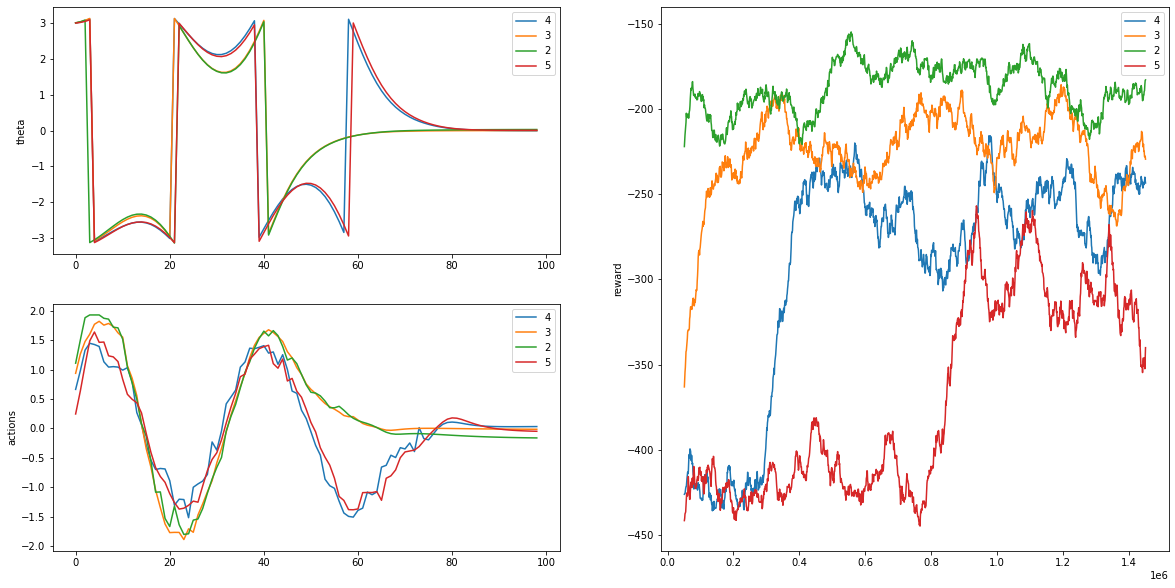

In [9]:
label = "eps"

def plot_eval(folders):
    plt.figure()
    for folder in folders:
        results = run_eval.evaluate(folder, init=[3, 0])
        tb = results["basependulum"]["mean_reward"]
        tb_times = tb[0]
        tb_rew = [a[0] for a in tb[1]]
        
        n=101
        tb_smoothed = np.cumsum(tb_rew, dtype=float)
        tb_smoothed[n:] = tb_smoothed[n:] - tb_smoothed[:-n]
        tb_smoothed =  tb_smoothed[n - 1:] / n

        theta = results["basependulum"]["thetas"]
        actions = results["basependulum"]["actions"]
        with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
            params = pickle.load(f)
        plt.subplot(122)
        #plt.plot(tb_times, tb_rew, label=str(params[label]))
        plt.plot(tb_times[50:-50], tb_smoothed, label=str(params[label]))
        plt.subplot(221)
        plt.plot(theta, label=str(params[label]))
        #plt.ylim([-4, 4])
        plt.subplot(223)
        plt.plot(actions, label=str(params[label]))   
        
    plt.subplot(122)
    plt.ylabel("reward")
    plt.legend()
    plt.subplot(221)
    plt.ylabel("theta")
    plt.legend()
    plt.subplot(223)
    plt.ylabel("actions")
    plt.legend()
    plt.show()
        
plot_eval(filt(check))

# Rendering Station

DON"T USE YET, BEHAVIOR NOT WORKING

In [10]:
folder = '02_14_2022_123836_Mohsin'
env_name = 'newpendulum'
model_name = 'best_model'
with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
            params = pickle.load(f)
env = params.envs[env_name].eval_env(params)
env.reset()
models_path = os.path.join(os.path.join("./Runs", folder), env_name + "/models")
model = SAC.load(os.path.join(models_path, model_name))

obs = env.reset()
done = False
i = 0
while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    #env.render()

/opt/anaconda3/envs/rl/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
2022-02-16 18:15:03.364 python[22933:5122028] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f7f60cf10e0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-02-16 18:15:03.365 python[22933:5122028] Warning: Expected min height of view: (<NSButton: 0x7f7f62f38760>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-02-16 18:15:03.366 python[22933:5122028] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f7f62f38c50>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-02-16 18:15:03.367 python[22933:5122028] Warning: Expected min he